### 1 Executive Summary

### 2 Background

As a successful dot-com start-ups, after fast growth initially, QWE realized the need for deeper analytical insight into some key business processes, one of which was customer retention. At first, QWE tried to convince the customer to extend the contract by offering free services or discounts on existing services. However, QWE wondered if they could develop a more proactive approach. Also, they hoped they could estimate the probability that a given customer would leave in the near future and identify the drivers that contributed most to that customer’s decision. To solve this problem, QWE wanted to generate a list of the 100 customers who were most likely to leave and, if possible, the three factors contributing most to that likelihood.

To collect dataset, QWE rolled back two months to December 1, 2011, and obtained a sample of 6,000 of QWE’s customers as of that date. To start with this task, Customer age, CHI [Customer Happiness Index], and service and usage patterns are thought as the most important characteristics to solve this problem. QWE doubted that those customers with high CHI scores leave much, but those who are unhappy might leave, and so might those for whom CHI scores dropped recently. Also, number of support cases, average support priority, and usage information: logins, blogs, views, and days since last login are related with the customer retention.

### 3 Initial Data Analysis

The dataset provided for this analysis includes 6,347 observations, each of which represents information for a given customer, across 13 variables:
- ID - The id of a customer
- CustomerAgeinmonths  
- Churn1Yes0No 
- CHIScoreMonth0 
- CHIScore01 
- SupportCasesMonth0 
- SupportCases01 
- SPMonth0 
- SP01 
- Logins01 
- BlogArticles01 
- Views01 
- DaysSinceLastLogin01 


### 4 Method And Results

#### 4.1 Is Wall’s belief about the dependence of churn rates on customer age supported by the data? To get some intuition, try visualizing this dependence (Hint: no need to run any statistical tests).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join("data", "caseStudyCleaned.csv")

if not os.path.exists(data_path):
    print("Download data first!")

df = pd.read_csv(data_path)

Text(0, 0.5, 'Churn')

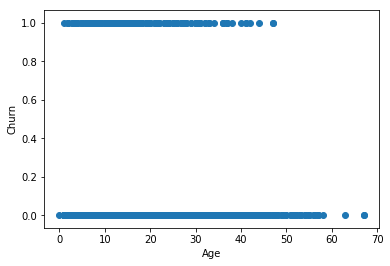

In [3]:
plt.scatter(df['CustomerAgeinmonths'],df['Churn1Yes0No'])
plt.xlabel("Age")
plt.ylabel('Churn')

From the graph, we can not see any relationship between churn rate and customer age. As a result, customer age can not support the dependence of churn age.

### 4.2 To start, run a single regression model that best predicts the probability that a customer leaves.

To run a single regression model, we select the CHIScoreMonth0 to predict the customer churn because it has much higher correlation value than others. 

|     Characteristic  | Churn1Yes0No |
|---------------------|--------------|
|ID                   |-0.106701     |
|CustomerAgeinmonths  |0.030215      |
|Churn1Yes0No         |1.000000      |
|CHIScoreMonth0       |-0.084005     |
|CHIScore01           |-0.008713     |
|SupportCasesMonth0   |-0.044973     |
|SupportCases01       |-0.044407     |
|SPMonth0             |-0.054935     |
|SP01                 |-0.019682     |
|Logins01             |-0.043077     |
|BlogArticles01       |-0.025090     |
|Views01              |0.000007      |
|DaysSinceLastLogin01 |0.111568      |

Then, we can generate the single regression model: 

$$ Churn1Yes0No = -2.46064255 - 0.00615342 * CHIScoreMonth0 $$


#### a. What is the predicted probability that Customer 672 will leave between December 2011 and February 2012? Is that high or low? Did that customer actually leave?

In [8]:
from sklearn.linear_model import LogisticRegression

myLogMod = LogisticRegression(solver = 'lbfgs').fit(np.array([df.CHIScoreMonth0]).T, np.array([df.Churn1Yes0No]).T)
b_1 = myLogMod.coef_
b_0 = myLogMod.intercept_
print(b_0, b_1)
prediction = LogisticRegression(solver = 'lbfgs').fit(np.array([df.CHIScoreMonth0]).T, np.array([df.Churn1Yes0No]).T)
list = prediction.predict_proba(np.array([df.CHIScoreMonth0]).T)[:, 1]
print(list[671])
print(list[353])
print(list[5202])

[-2.46064255] [[-0.00615342]]
0.033202967751108405
0.03502742009007802
0.06366613937623102


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After we get the single refression model, we can calculate the the predicted probability with following equation:

$$ P(Churn1Yes0No) = \frac{1}{1 + e^{-(-2.46064255 - 0.00615342 * CHIScoreMonth0)}} $$

|   ID   | CHI Score | Probability | Leave |
|--------|-----------|-------------|-------|
|672     |148        | 3.3%        | NO    |

From above list, we can see that the customer 672 actually did not leave.

#### b. What about Customers 354 and 5,203?

|   ID   | CHI Score | Probability | Leave |
|--------|-----------|-------------|-------|
|354     |139        | 3.5%        | NO    |
|5203    |37         | 6.36%       | NO    |

From above list, we can see that the customer 354 and 5203 actually did not leave.

### 4.3 How sensible is the approach with a single model? Can you suggest a better approach?

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [41]:
X_train, X_test , y_train, y_test = \
    train_test_split(np.array(df['CHIScoreMonth0']), np.array(df['Churn1Yes0No']), test_size = 0.5, random_state = 11)
myLinReg = LinearRegression()
x = myLinReg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
linRegPreds = x.predict(X_test.reshape(-1,1))
print("MSE: " + str(mean_squared_error(y_test,linRegPreds)))

MSE: 0.04829851187042081


In [42]:
# Create a vector of alphas from 5 billion to 0.005
alphas = 10**np.linspace(10, -4, 500)*0.5
df_x = df[['CustomerAgeinmonths','CHIScoreMonth0','CHIScore01','SupportCasesMonth0','SupportCases01','SPMonth0','SP01',
    'Logins01','BlogArticles01','Views01','DaysSinceLastLogin01']]
df_y = df['Churn1Yes0No']
X_train, X_test , y_train, y_test = \
    train_test_split(np.array(df_x), np.array(df_y), test_size = 0.5, random_state = 11)

In [43]:
myLinReg = LinearRegression()
x = myLinReg.fit(X_train, y_train)
linRegPreds = x.predict(X_test)
print("MSE: " + str(mean_squared_error(y_test,linRegPreds)))

MSE: 0.04799085045280179


In [44]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)

    for i in range(X_train.shape[1]):
        coefs.append([a, "b_" + str(i + 1), lasso.coef_[i]])

In [45]:
myCoefs = pd.DataFrame(coefs, columns=['alpha', 'beta', 'beta_val'])
myCoefs.iloc[5450:]

,alpha,beta,beta_val
5450,0.000065,b_6,-0.005218
5451,0.000065,b_7,0.000000
5452,0.000065,b_8,0.000000
5453,0.000065,b_9,-0.000000
5454,0.000065,b_10,0.000000
5455,0.000065,b_11,0.011148
5456,0.000061,b_1,0.006085
5457,0.000061,b_2,-0.009899
5458,0.000061,b_3,0.002121
5459,0.000061,b_4,-0.001267


In [46]:
lassocv = LassoCV(cv = 10, normalize = True)
lassocv.fit(X_train, y_train)

print('Optimal Alpha: ' + str(lassocv.alpha_))

lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

print('MSE: ' + str(mean_squared_error(y_test, lasso.predict(X_test))))

Optimal Alpha: 5.722114280497082e-05
MSE: 0.04792041154813162


For this single model, the MSE is 0.04829851187042081.

If we want a better approach to predict the probability that a customer leaves, we can choose Multiple Logistic Regression(MLR). In this way, we can use multiple customer characteristics to predict the probability that a customer leaves.

For this approach, we choose three customer characteristics in our 

- CustomerAgeinmonths 
- CHIScoreMonth0
- CHIScore01
- SupportCasesMonth0
- SPMonth0
- DaysSinceLastLogin01

We choose above six features by using ASSSO Regression, after calculation, we can know that Optimal Alpha as 5.722114280497082e-05, and the the MSE is 0.04792041154813162.

|alpha    |beta |beta_val  |
|---------|-----|----------|
|0.000057 |b_1  |0.006374  |
|0.000057 |b_2	|-0.010174 |
|0.000057 |b_3	|0.002457  |
|0.000057 |b_4	|-0.001405 |
|0.000057 |b_5	|-0.000000 |
|0.000057 |b_6	|-0.005363 |
|0.000057 |b_7	|0.000000  |
|0.000057 |b_8	|0.000000  |
|0.000057 |b_9	|-0.000000 |
|0.000057 |b_10 |0.000000  |
|0.000057 |b_11 |0.011327  |


#### a. Provide updated estimates of probabilities that Customers 672, 354, and 5,203 will leave.

In [21]:
prediction = LogisticRegression(solver = 'lbfgs')\
    .fit(np.array([df.CustomerAgeinmonths, df.CHIScoreMonth0,df.CHIScore01, df.SupportCasesMonth0, df.SPMonth0, df.DaysSinceLastLogin01]).T,
         np.array([df.Churn1Yes0No]).T)
print(prediction.coef_)
print(prediction.intercept_)

[[ 0.0155824  -0.00609524  0.00339462 -0.04366652 -0.05840514  0.0109126 ]]
[-2.80257555]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
list = prediction.predict_proba(np.array([df.CustomerAgeinmonths, df.CHIScoreMonth0,df.CHIScore01,
                                          df.SupportCasesMonth0, df.SPMonth0, df.DaysSinceLastLogin01]).T)[:, 1]
print(list[671])
print(list[353])
print(list[5202])

0.031366885104610935
0.034294089568494196
0.05487571946497283


After we select CustomerAgeinmonths, CHIScoreMonth0, CHIScore01, SupportCasesMonth0, SPMonth0, DaysSinceLastLogin01 as varibles in the model, we can get the equation in the Multiple  Logistic Regression(MLR):

$$ Churn1Yes0No = -2.80257555 + 0.0155824 * CustomerAgeinmonths - 0.00609524 * CHIScoreMonth0 + 0.00339462 * CHIScore01 - 0.04366652 * SupportCasesMonth0 - 0.05840514 * SPMonth0 + 0.0109126 * DaysSinceLastLogin01 $$

Also, the following formula is the equation of the predicted probability:

$$ P(Churn1Yes0No) = \frac{1}{1 + e^{-(-2.80257555 + 0.0155824 * CustomerAgeinmonths - 0.00609524 * CHIScoreMonth0 + 0.00339462 * CHIScore01 - 0.04366652 * SupportCasesMonth0 - 0.05840514 * SPMonth0 + 0.0109126 * DaysSinceLastLogin01)}} $$

Now, we can updated estimates of probabilities that Customers 672, 354, and 5,203 will leave:

|   ID   | Probability | Leave |
|--------|-------------|-------|
|672     | 3.13%       | NO    |
|354     | 3.42%       | NO    |
|5203    | 5.48%       | NO    |


#### b. What factors contribute the most to the predicted probabilities that these customers will leave?

From the correlation among the customer characteristics, we can find that the factors contribute the most to the predicted probabilities that these customers will leave is DaysSinceLastLogin01.

### 4.4 Answer Wall’s “ultimate question”: provide the list of 100 customers with highest churn probabilities and the top three drivers of churn for each customer.

In [23]:
df['prob'] = pd.Series(list, index=df.index)
df[['ID', 'prob']].sort_values(by=['prob'], ascending=False).head(100)

,ID,prob
2699,2700,0.974376
1495,1496,0.458863
132,133,0.426489
1862,1863,0.404036
2562,2563,0.373847
1889,1890,0.322436
870,871,0.296089
1521,1522,0.282410
1180,1181,0.274487
1107,1108,0.257002


There is the list of 100 customers with highest churn probabilities.